In [1]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 300
min_pair_overs = 60  # 1/5th of min_overs

In [2]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/testout.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
qbovercnt

,over
bowler,
A Kumble,446
AD Mathews,312
Abdur Rehman,471
B Lee,324
BA Stokes,429
CS Martin,483
D Bishoo,466
DBL Powell,316
DJ Bravo,382


In [3]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/testpair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,0,1,B Lee,7,0,2,PM Siddle
1,4,0,3,B Lee,4,0,4,PM Siddle
2,4,0,5,B Lee,1,0,6,PM Siddle
3,5,0,7,B Lee,8,0,8,PM Siddle
4,9,0,9,MG Johnson,4,0,10,PM Siddle
...,...,...,...,...,...,...,...,...
32815,3,0,119,RL Chase,2,0,120,AS Joseph
32816,2,0,121,RL Chase,7,1,122,AS Joseph
32817,5,0,123,RL Chase,4,0,124,AS Joseph
32818,2,0,125,RL Chase,0,0,126,ML Cummins


In [4]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())

In [5]:
#names = og_data['bowler'].unique()
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

len(Bpartners)

64

In [6]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1

A Kumble Harbhajan Singh 171
A Kumble Z Khan 68
AD Mathews HMRKB Herath 86
Abdur Rehman Saeed Ajmal 181
Abdur Rehman Umar Gul 76
B Lee SR Clark 76
BA Stokes MM Ali 93
BA Stokes JM Anderson 62
CS Martin DL Vettori 86
D Bishoo RL Chase 71
DBL Powell JE Taylor 67
DL Vettori JS Patel 63
DW Steyn M Morkel 175
DW Steyn M Ntini 216
DW Steyn VD Philander 154
Danish Kaneria Mohammad Sami 61
Danish Kaneria Umar Gul 121
FH Edwards JE Taylor 73
GP Swann MS Panesar 76
GP Swann SCJ Broad 139
GP Swann JM Anderson 153
GP Swann TT Bresnan 96
HMRKB Herath N Pradeep 96
HMRKB Herath RAS Lakmal 102
HMRKB Herath MDK Perera 118
HMRKB Herath RMS Eranga 87
HMRKB Herath S Randiv 71
Harbhajan Singh Z Khan 121
Harbhajan Singh I Sharma 129
Harbhajan Singh PP Ojha 147
I Sharma Mohammed Shami 64
I Sharma UT Yadav 72
I Sharma R Ashwin 158
I Sharma Z Khan 141
I Sharma PP Ojha 62
I Sharma RA Jadeja 69
JE Taylor KAJ Roach 64
JE Taylor SJ Benn 102
JH Kallis PL Harris 62
JH Kallis M Morkel 93
JM Anderson SCJ Broad 548
JM 

In [7]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))


#Bpartner_qualified.keys()

61


In [25]:
Bowlers_x = []
Bowlership_x = []
Bowler_Econ = []
Bowlership_Econ = []

Bowlers_x_knot = []
Bowlership_x_knot = []
Bowler_Econ_knot = []
Bowlership_Econ_knot = []


from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu


for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())

        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d
        
        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 

        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        
        if (p_value1 < alpha) and (p_value2 < alpha):
            Bowlers_x.append(name)
            Bowlership_x.append(name + "-" + pname)
            Bowler_Econ.append(be)
            Bowlership_Econ.append(bse)
        
        
        else:
            Bowlers_x_knot.append(name)
            Bowlership_x_knot.append(name + "-" + pname)
            Bowler_Econ_knot.append(be)
            Bowlership_Econ_knot.append(bse)
        

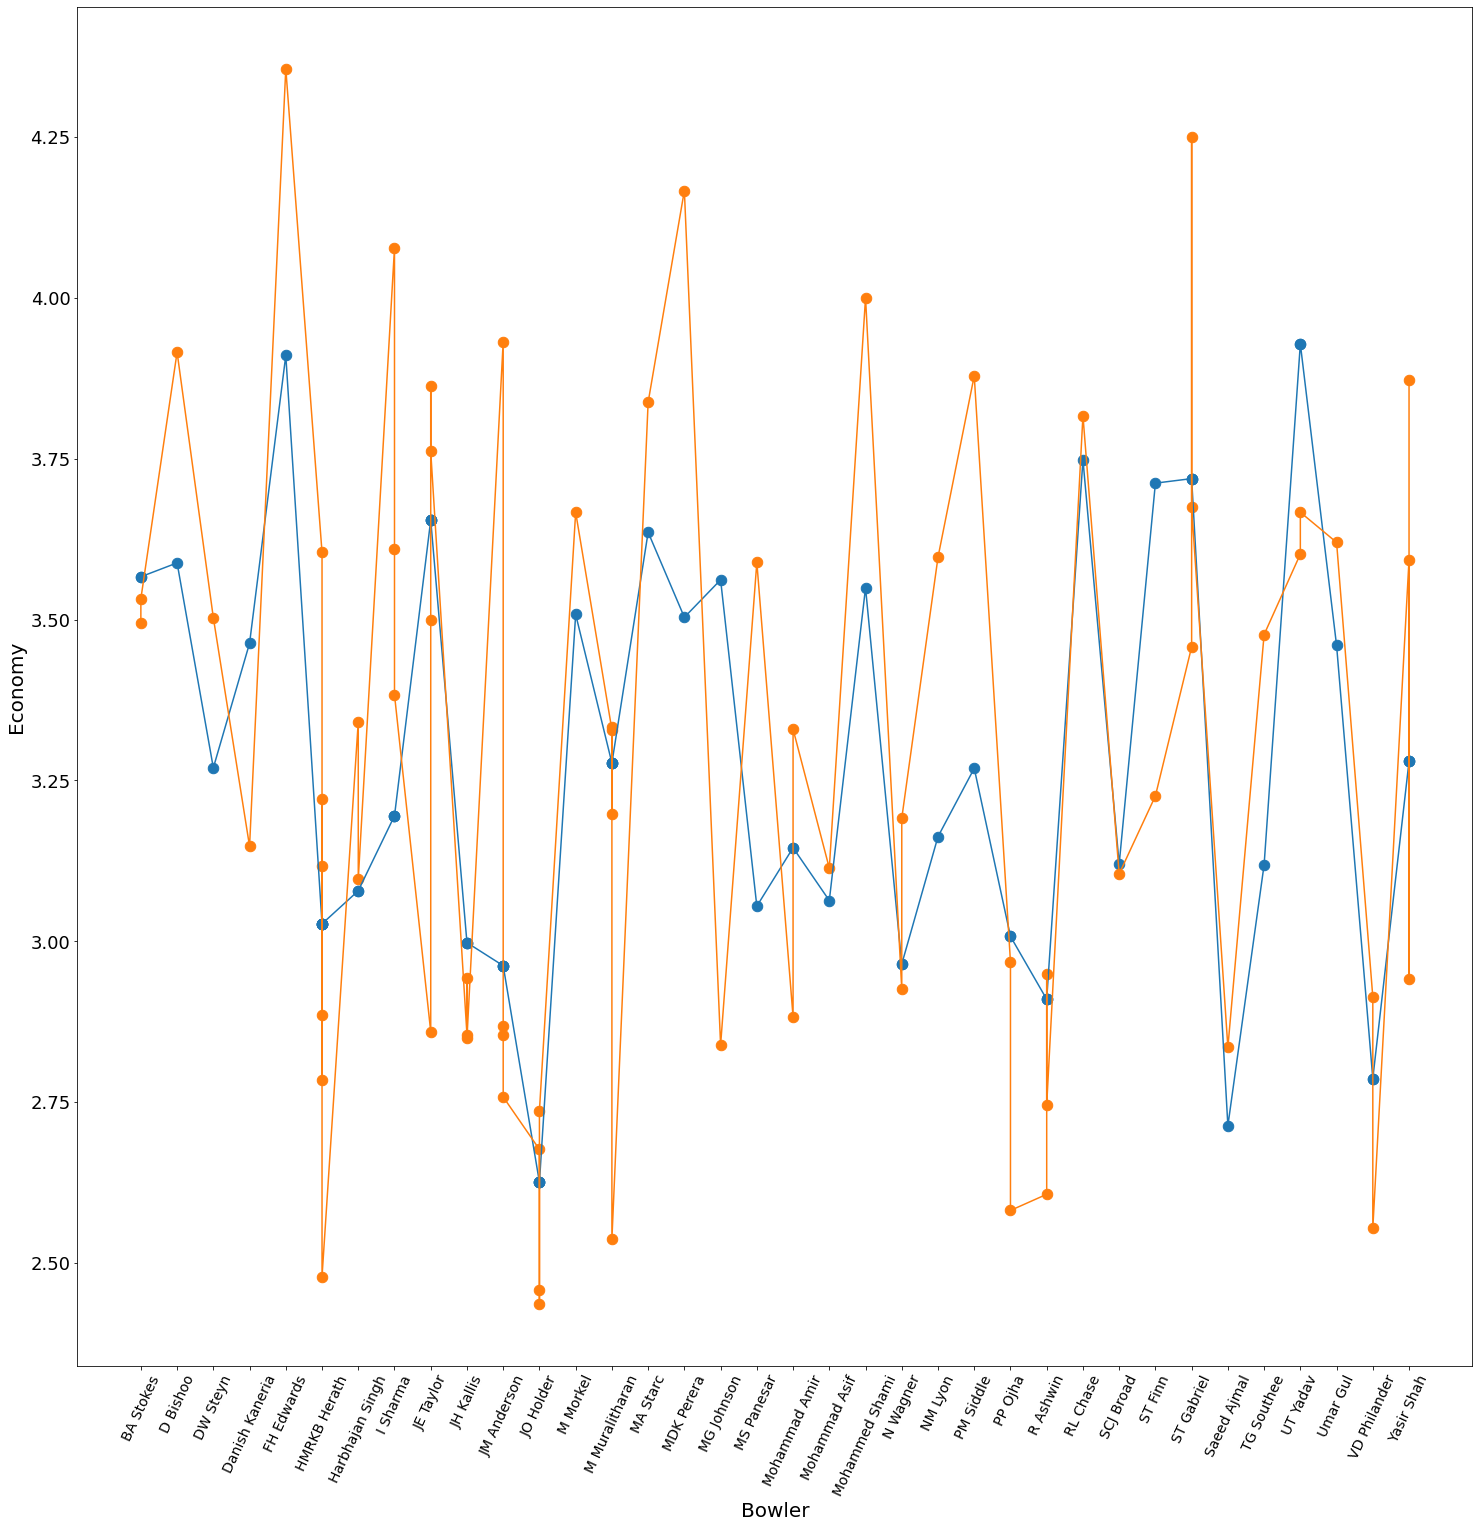

In [26]:
import matplotlib
from matplotlib import rc, rcParams

Bowler_set = list(set(Bowlers_x))
Econ_set = list(set(Bowler_Econ))

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ,Bowlership_Econ]:
    ax.scatter(Bowlers_x, Y, s=110)
    plt.plot(Bowlers_x, Y)

plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/Test/bowlership-eco-scatter-test.png', dpi=300, bbox_inches='tight', transparent = True)


In [27]:
bowler_improv = list(np.array(Bowler_Econ) - np.array(Bowlership_Econ))
bowler_improv = list(100*np.array(bowler_improv)/np.array(Bowler_Econ))

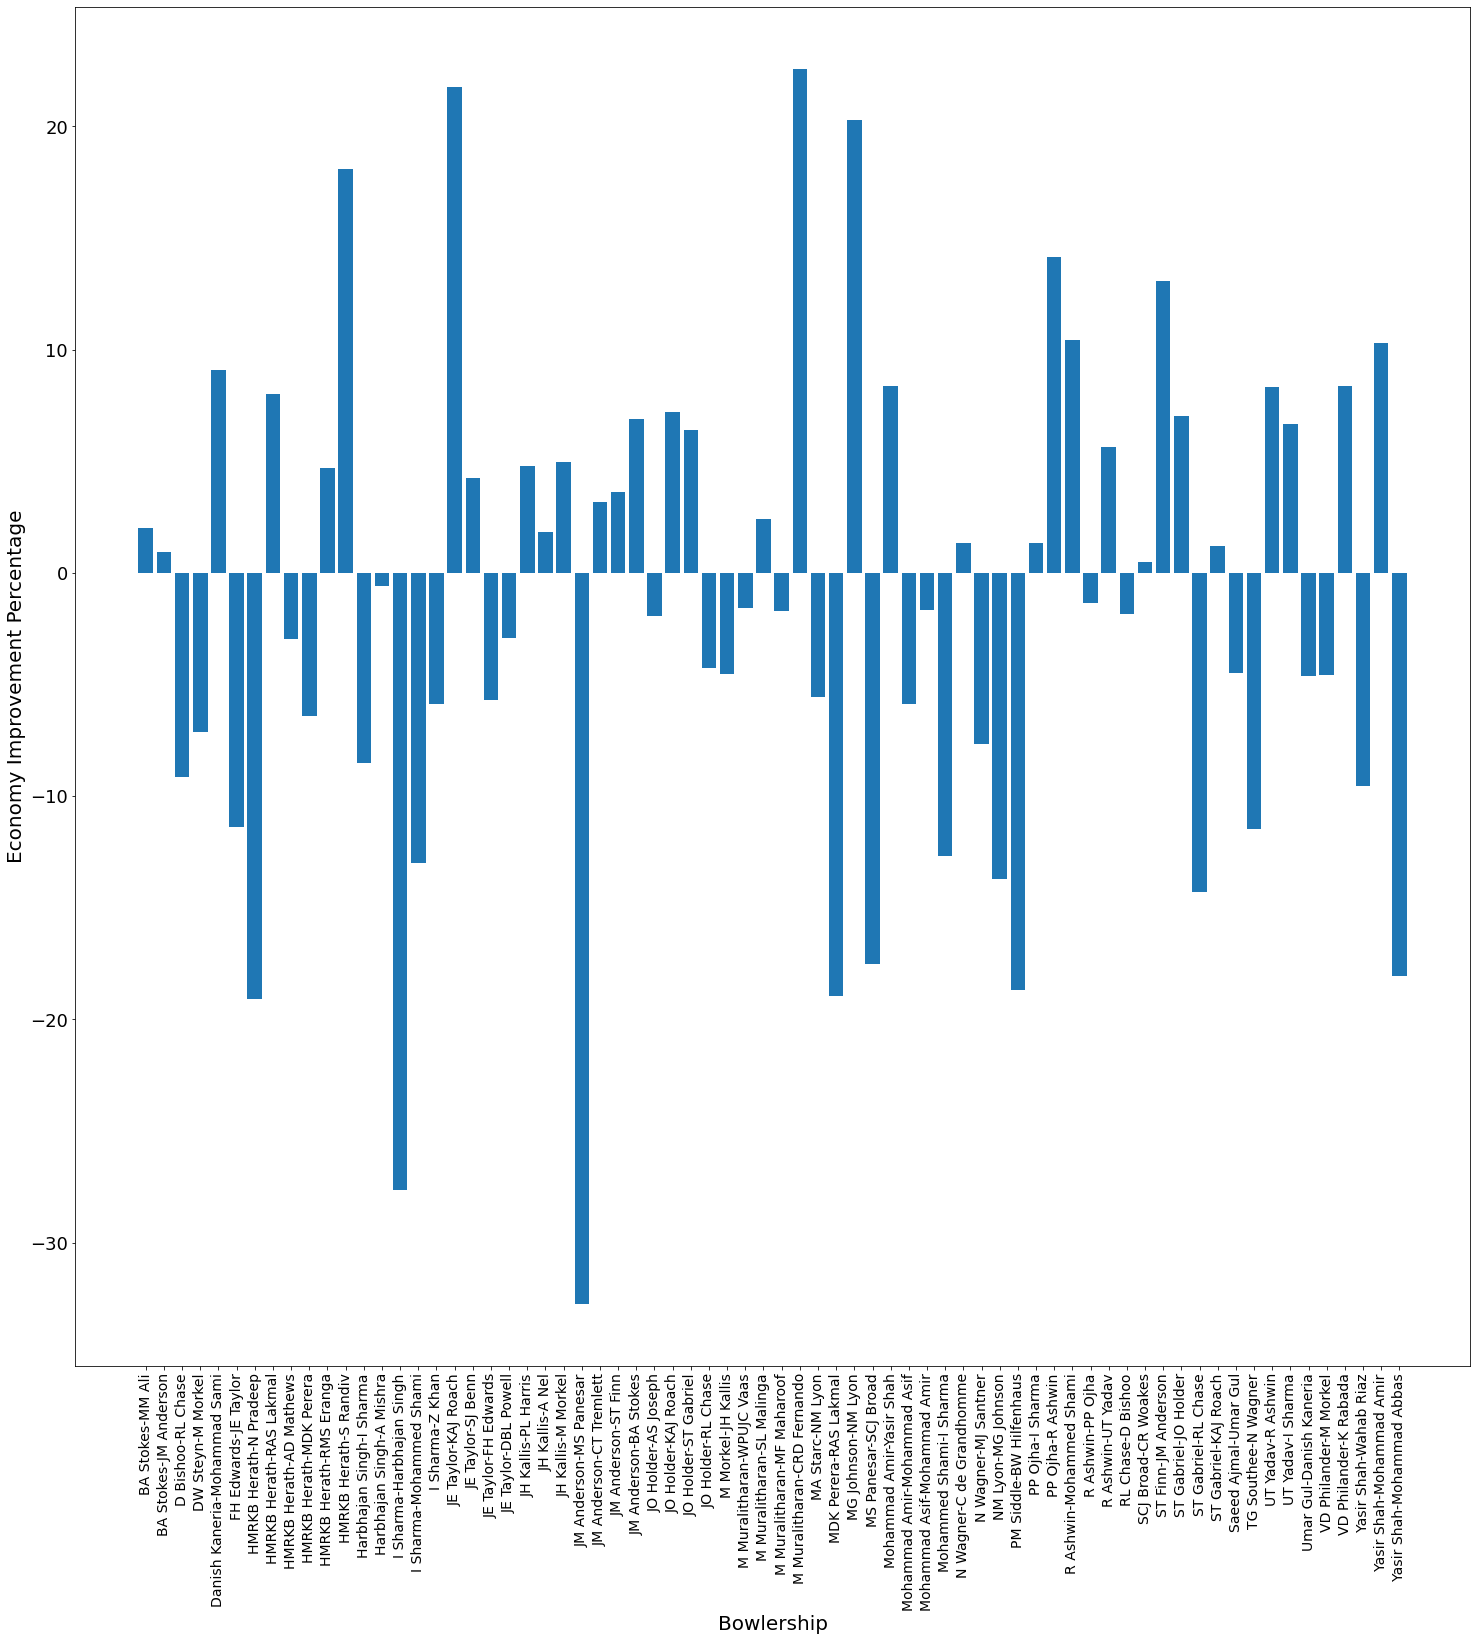

In [28]:
import matplotlib
from matplotlib import rc, rcParams

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowlership",fontsize = 20)
plt.ylabel("Economy Improvement Percentage", fontsize = 20)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=18)

plt.bar(Bowlership_x, bowler_improv)
plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/Test/bowlership-%-improv-test.png', dpi=300, bbox_inches='tight', transparent = True)


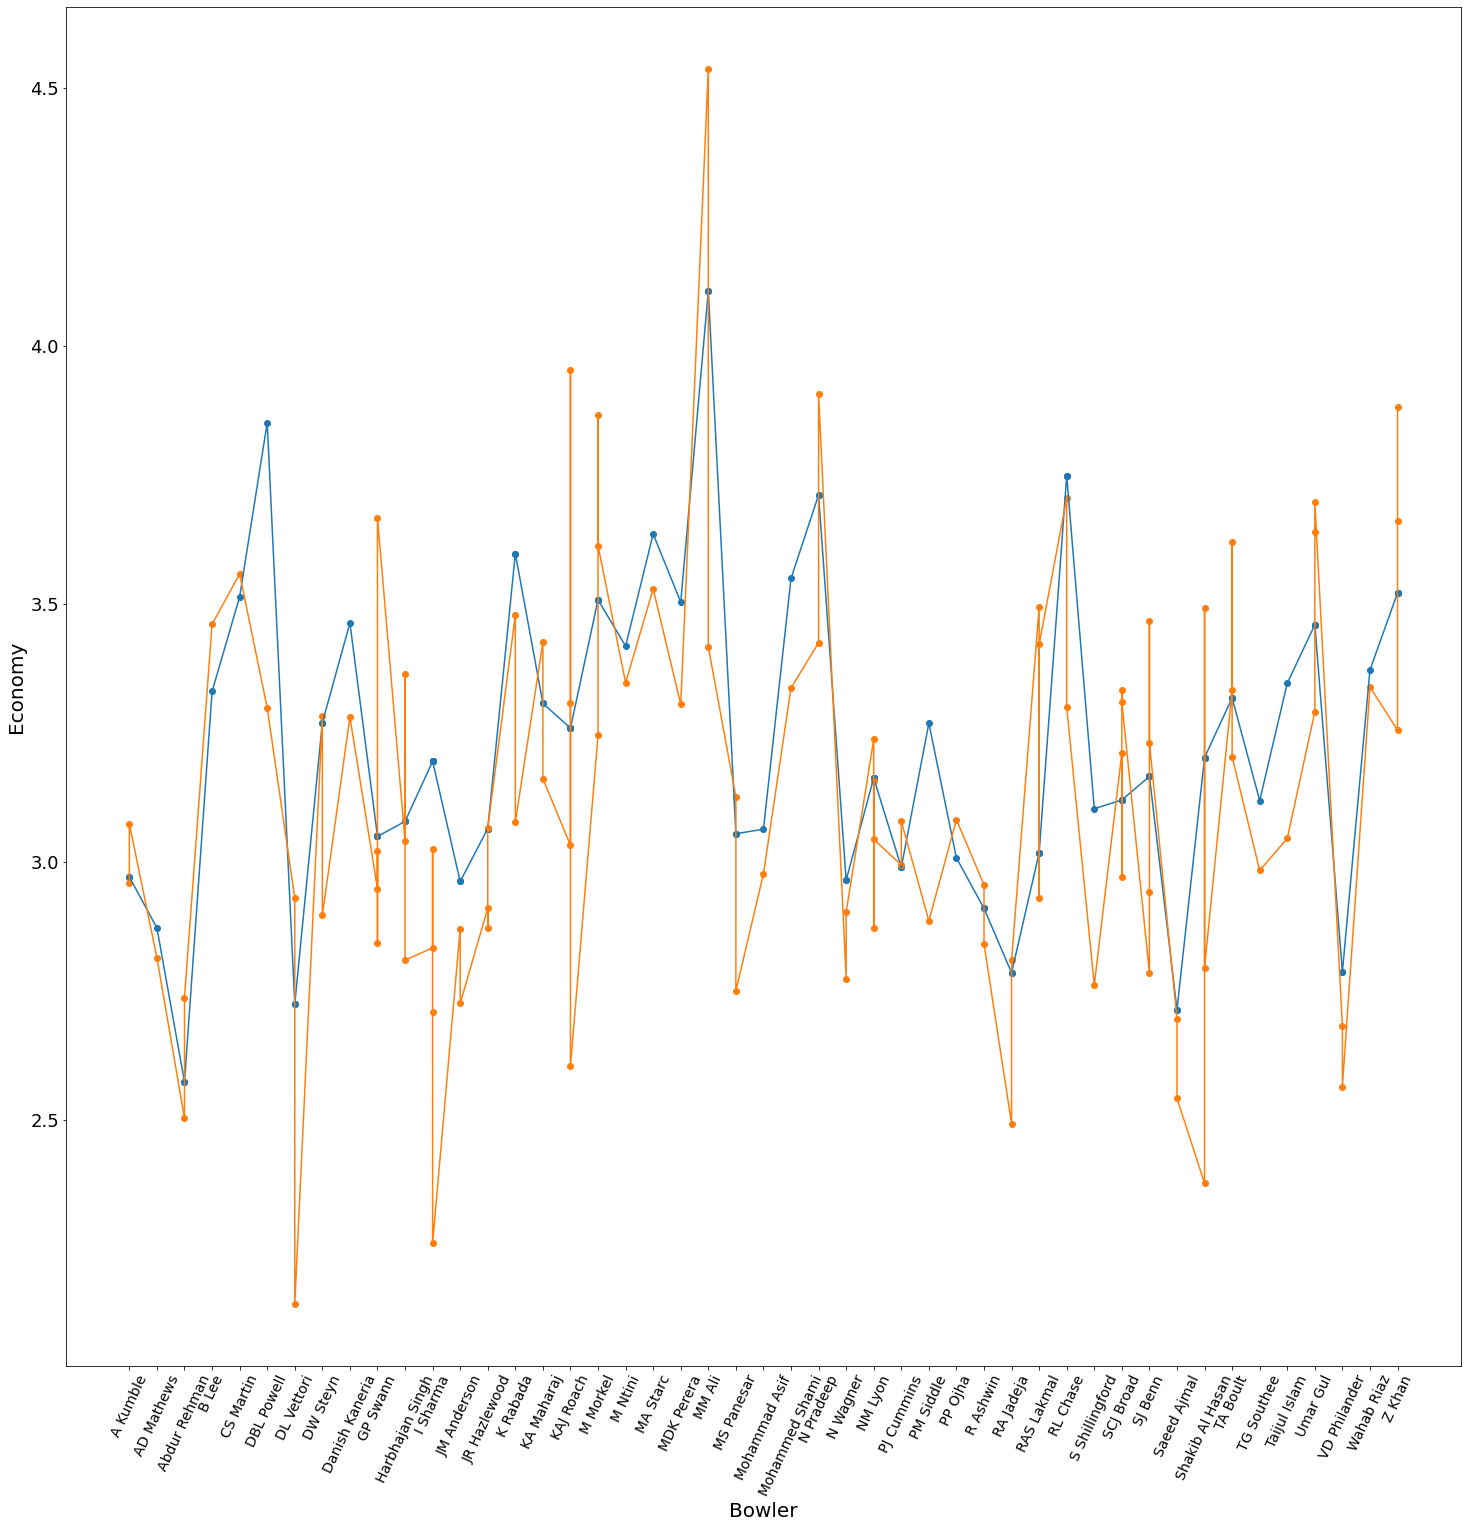

In [29]:
import matplotlib
from matplotlib import rc, rcParams

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ_knot, Bowlership_Econ_knot]:
    ax.scatter(Bowlers_x_knot, Y)
    plt.plot(Bowlers_x_knot, Y)
    
plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/Test/nonpositive-bowlership-eco-scatter-test.png', dpi=300, bbox_inches='tight', transparent = True)


In [30]:
Bowlers_x = []
Bowlership_x = []
Bowler_Econ = []
Bowlership_Econ = []


from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:

        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())

        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d

        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 
        
        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        
        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        
        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        
        if (p_value1 < alpha) and (p_value2 < alpha) and (be>bse):
        
            Bowlers_x.append(name)
            Bowlership_x.append(name + "-" + pname)
            Bowler_Econ.append(be)
            Bowlership_Econ.append(bse)
            

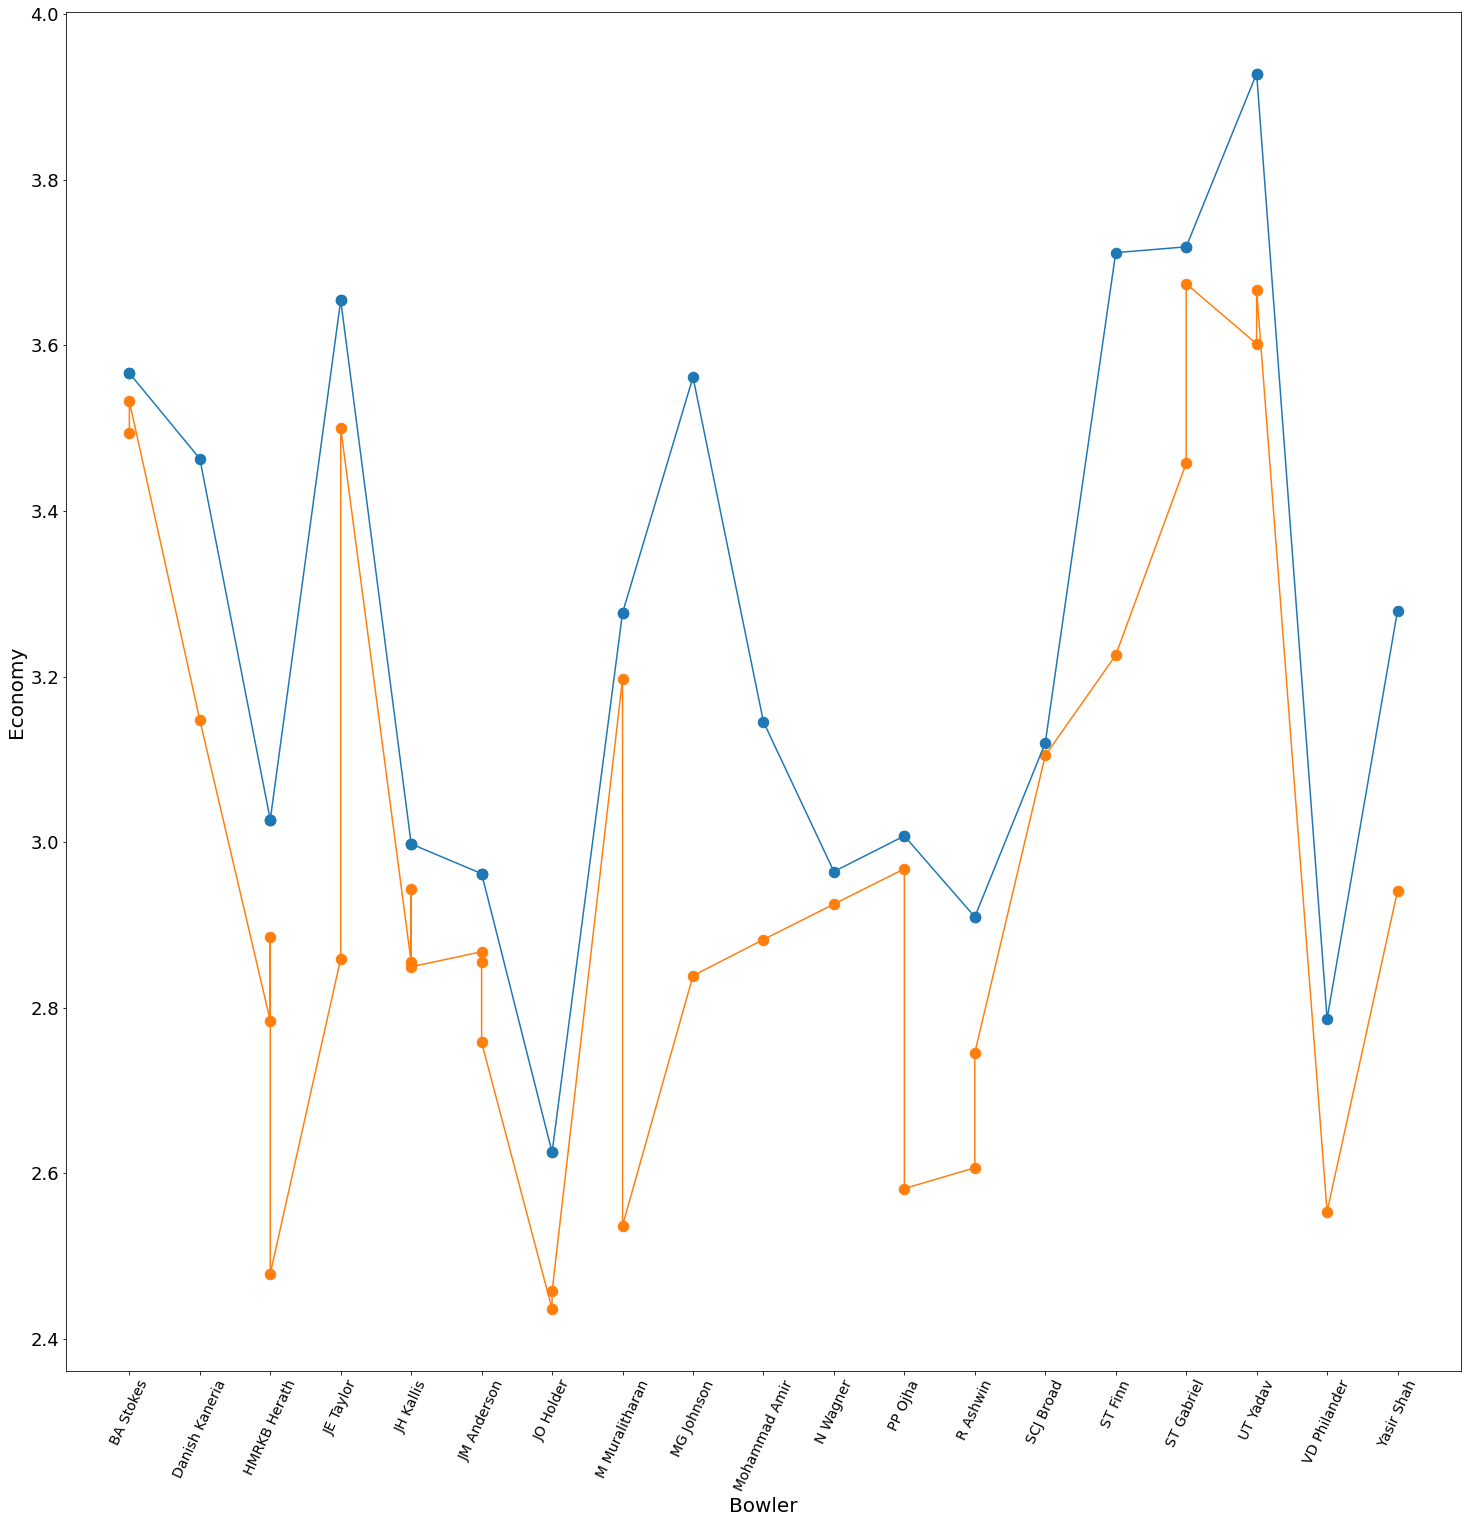

In [31]:
import matplotlib
from matplotlib import rc, rcParams

Bowler_set = list(set(Bowlers_x))
Econ_set = list(set(Bowler_Econ))

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ,Bowlership_Econ]:
    ax.scatter(Bowlers_x, Y, s=110)
    plt.plot(Bowlers_x, Y)

plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/Test/bowlership-pos-eco-scatter-test.png', dpi=300, bbox_inches='tight', transparent = True)


In [8]:
from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu


for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())


        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d

        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 
        
        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        
        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        
        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        
        if (p_value1 < alpha) and (p_value2 < alpha) and (be>bse):
            print(name,",",pname)
        

BA Stokes , MM Ali
BA Stokes , JM Anderson
Danish Kaneria , Mohammad Sami
HMRKB Herath , RAS Lakmal
HMRKB Herath , RMS Eranga
HMRKB Herath , S Randiv
JE Taylor , KAJ Roach
JE Taylor , SJ Benn
JH Kallis , PL Harris
JH Kallis , A Nel
JH Kallis , M Morkel
JM Anderson , CT Tremlett
JM Anderson , ST Finn
JM Anderson , BA Stokes
JO Holder , KAJ Roach
JO Holder , ST Gabriel
M Muralitharan , SL Malinga
M Muralitharan , CRD Fernando
MG Johnson , NM Lyon
Mohammad Amir , Yasir Shah
N Wagner , C de Grandhomme
PP Ojha , I Sharma
PP Ojha , R Ashwin
R Ashwin , Mohammed Shami
R Ashwin , UT Yadav
SCJ Broad , CR Woakes
ST Finn , JM Anderson
ST Gabriel , JO Holder
ST Gabriel , KAJ Roach
UT Yadav , R Ashwin
UT Yadav , I Sharma
VD Philander , K Rabada
Yasir Shah , Mohammad Amir
